# 21BDS0207 Jatin Pareek 

## Digital Assessment - 1 

## Module 1: Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4892 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4893 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   object 
 14  arms_category           

<Axes: >

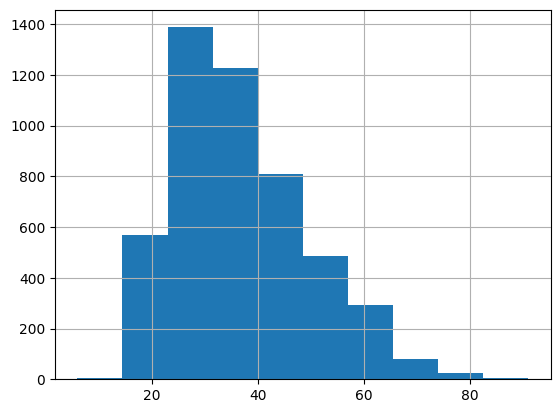

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("C:\\Users\\Jatin\\Desktop\\shootings.csv")

# Steps in EDA: Basic Data Overview
df.info()  # Check data types and missing values
df.describe()  # Summary statistics for numerical data

# Handling categorical data (nominal and ordinal data)
print(df['armed'].value_counts())

# Example of EDA for discrete (count) and continuous data (e.g., age)
df['age'].hist()  # Plot a histogram for continuous data


## Module 2: Data Transformation

In [11]:
# Data Deduplication
df.drop_duplicates(inplace=True)

# Handling missing data (e.g., age or other columns with NaN)
df.fillna(value={'age': df['age'].median()}, inplace=True)

# Replacing Values (Example: converting 'body_camera' to Boolean)
df['body_camera'] = df['body_camera'].map({'FALSE': False, 'TRUE': True})

# Binning the 'age' column into categories
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 55, 100], labels=['Youth', 'Young Adult', 'Middle Aged', 'Senior'])

# Print the updated dataset after data transformation
print("Updated dataset after Module 2 - Data Transformation:")
print(df.head())


Updated dataset after Module 2 - Data Transformation:
   id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun  53.0   
1   4    Lewis Lee Lembke  02/01/15              shot         gun  47.0   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon  32.0   
4   9   Michael Rodriguez  04/01/15              shot    nail gun  39.0   

  gender      race           city state  signs_of_mental_illness threat_level  \
0      M     Asian        Shelton    WA                     True       attack   
1      M     White          Aloha    OR                    False       attack   
2      M  Hispanic        Wichita    KS                    False        other   
3      M     White  San Francisco    CA                     True       attack   
4      M  Hispanic          Evans    CO                    False       attack   

        

## Module 3: Correlation Analysis

Module 3 - Correlation:
            id                name   manner_of_death       armed   age gender  \
date                                                                            
2015-01-02   3          Tim Elliot              shot         gun  53.0      M   
2015-01-02   4    Lewis Lee Lembke              shot         gun  47.0      M   
2015-01-03   5  John Paul Quintero  shot and Tasered     unarmed  23.0      M   
2015-01-04   8     Matthew Hoffman              shot  toy weapon  32.0      M   
2015-01-04   9   Michael Rodriguez              shot    nail gun  39.0      M   

                race           city state  signs_of_mental_illness  \
date                                                                 
2015-01-02     Asian        Shelton    WA                     True   
2015-01-02     White          Aloha    OR                    False   
2015-01-03  Hispanic        Wichita    KS                    False   
2015-01-04     White  San Francisco    CA                 

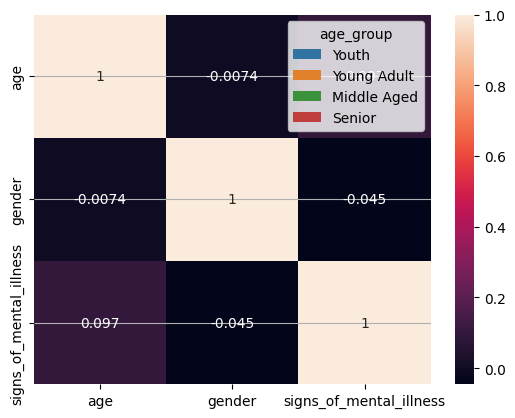

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis (age distribution)
df['age'].hist()

# Bivariate Analysis (age vs manner_of_death)
sns.countplot(x='manner_of_death', hue='age_group', data=df)

# Multivariate Analysis (correlation between age, gender, and signs of mental illness)
df_corr = df[['age', 'gender', 'signs_of_mental_illness']].copy()

# Encoding categorical columns for correlation
df_corr['gender'] = df_corr['gender'].map({'M': 1, 'F': 0})
df_corr['signs_of_mental_illness'] = df_corr['signs_of_mental_illness'].map({True: 1, False: 0})
sns.heatmap(df_corr.corr(), annot=True)

# Print the updated dataset after correlation and time series analysis
print("Module 3 - Correlation:")
print(df.head())


## Module 4: Data Summarization and Visualization

count    4888.000000
mean       36.555651
std        12.700321
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64
arms_category     Blunt instruments  Electrical devices  Explosives  Guns  \
manner_of_death                                                             
shot                            105                  17           4  2720   
shot and Tasered                 17                   7           0    38   

arms_category     Hand tools  Multiple  Other unusual objects  \
manner_of_death                                                 
shot                       0        50                    183   
shot and Tasered           1         4                      9   

arms_category     Piercing objects  Sharp objects  Unarmed  Unknown  Vehicles  
manner_of_death                                                                
shot                            23            702      308      407       12

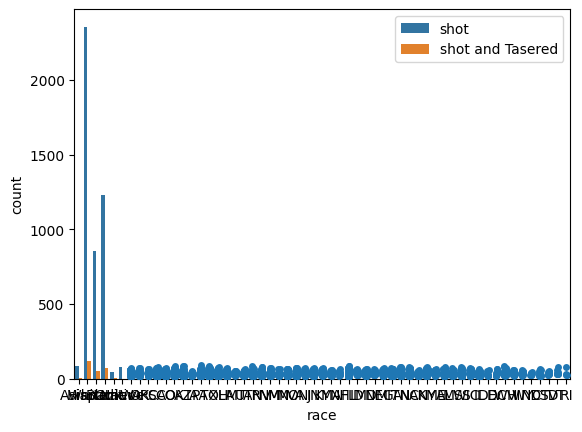

In [20]:
# 1D Statistical summary (age)
print(df['age'].describe())

# 2D Data analysis: contingency table for manner_of_death and arms_category
contingency_table = pd.crosstab(df['manner_of_death'], df['arms_category'])
print(contingency_table)

# Visualization (bar plot of manner_of_death by race)
sns.countplot(x='race', hue='manner_of_death', data=df)

# Dot chart (age distribution across states)
sns.stripplot(x='state', y='age', data=df)

# Print the updated dataset after data summarization and visualization
print("Module 4 - Data Summarization and Visualization:")
print(df.head())


## Module 5: Clustering Algorithms

Updated dataset after handling missing values and applying KMeans:
            id                name   manner_of_death       armed   age gender  \
date                                                                            
2015-01-02   3          Tim Elliot              shot         gun  53.0      M   
2015-01-02   4    Lewis Lee Lembke              shot         gun  47.0      M   
2015-01-03   5  John Paul Quintero  shot and Tasered     unarmed  23.0      M   
2015-01-04   8     Matthew Hoffman              shot  toy weapon  32.0      M   
2015-01-04   9   Michael Rodriguez              shot    nail gun  39.0      M   

                race           city state  signs_of_mental_illness  \
date                                                                 
2015-01-02     Asian        Shelton    WA                     True   
2015-01-02     White          Aloha    OR                    False   
2015-01-03  Hispanic        Wichita    KS                    False   
2015-01-04     

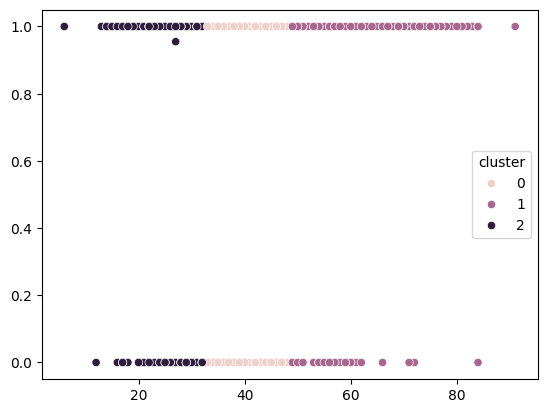

In [21]:
from sklearn.impute import SimpleImputer

# Impute missing values in the clustering features (age, gender, signs_of_mental_illness)
imputer = SimpleImputer(strategy='mean')  # Use mean to fill missing values
df_clustering_imputed = imputer.fit_transform(df_clustering)

# Perform KMeans clustering on the imputed data
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df_clustering_imputed)

# Visualize the clusters
sns.scatterplot(x=df_clustering_imputed[:, 0], y=df_clustering_imputed[:, 1], hue=df['cluster'])

# Print the updated dataset after clustering
print("Updated dataset after handling missing values and applying KMeans:")
print(df.head())


## Module 6 - Dimensionality Reduction

Updated dataset after performing PCA and t-SNE:
            id                name   manner_of_death       armed   age gender  \
date                                                                            
2015-01-02   3          Tim Elliot              shot         gun  53.0      M   
2015-01-02   4    Lewis Lee Lembke              shot         gun  47.0      M   
2015-01-03   5  John Paul Quintero  shot and Tasered     unarmed  23.0      M   
2015-01-04   8     Matthew Hoffman              shot  toy weapon  32.0      M   
2015-01-04   9   Michael Rodriguez              shot    nail gun  39.0      M   

                race           city state  signs_of_mental_illness  \
date                                                                 
2015-01-02     Asian        Shelton    WA                     True   
2015-01-02     White          Aloha    OR                    False   
2015-01-03  Hispanic        Wichita    KS                    False   
2015-01-04     White  San Francisc

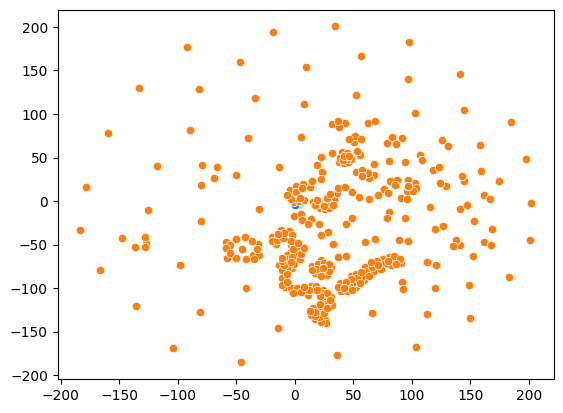

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# Impute missing values in the clustering features using mean
imputer = SimpleImputer(strategy='mean')
df_clustering_imputed = imputer.fit_transform(df_clustering_scaled)

# PCA for Dimensionality Reduction (using the imputed data)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_clustering_imputed)

# Visualizing the results of PCA
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1])

# t-SNE for non-linear dimensionality reduction (optional)
tsne = TSNE(n_components=2)
df_tsne = tsne.fit_transform(df_clustering_imputed)

# Visualizing the results of t-SNE
sns.scatterplot(x=df_tsne[:, 0], y=df_tsne[:, 1])

# Print the updated dataset
print("Updated dataset after performing PCA and t-SNE:")
print(df.head())


## Module 7 - Model Development and Evaluation

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Impute missing values in X_train using mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Impute missing values in X_test
X_test_imputed = imputer.transform(X_test)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train_imputed, y_train)

# Predictions and Accuracy
y_pred = lr.predict(X_test_imputed)

# Evaluate performance (e.g., with R-squared)
from sklearn.metrics import r2_score
print(f'R-squared: {r2_score(y_test, y_pred)}')


R-squared: 0.018776707218411404
